# Matplotlib
Matplotlib can output graphs using various backend graphics libraries, such as Tk, wxPython, etc. When running python using the command line, the graphs are typically shown in a separate window. In a Jupyter notebook, we can simply output the graphs within the notebook itself by running the `%matplotlib inline` magic command.

In [1]:
import matplotlib
%matplotlib inline
# matplotlib.use("TKAgg")  # use this instead in your program if you want to use Tk as your graphics backend.

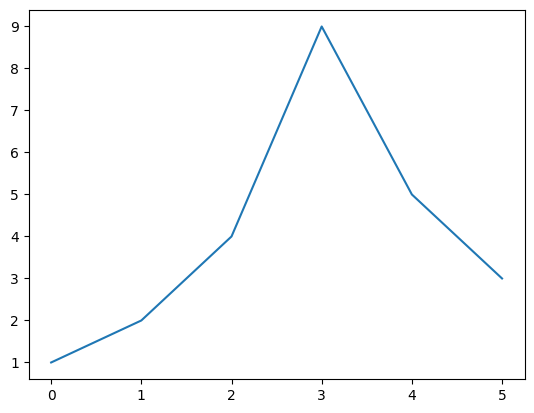

In [2]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 4, 9, 5, 3])
plt.show()

If the plot function is given one array of data, it will use it as the coordinates on the vertical axis, and it will just use each data point's index in the array as the horizontal coordinate. You can also provide two arrays: one for the horizontal axis `x`, and the second for the vertical axis `y`:

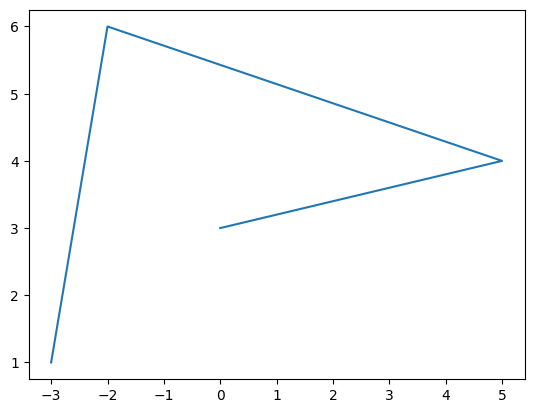

In [3]:
plt.plot([-3, -2, 5, 0], [1, 6, 4, 3])
plt.show()


The axes automatically match the extent of the data. We would like to give the graph a bit more room, so let's call the axis function to change the extent of each axis `xmin,  xmax, ymin, ymax]`.

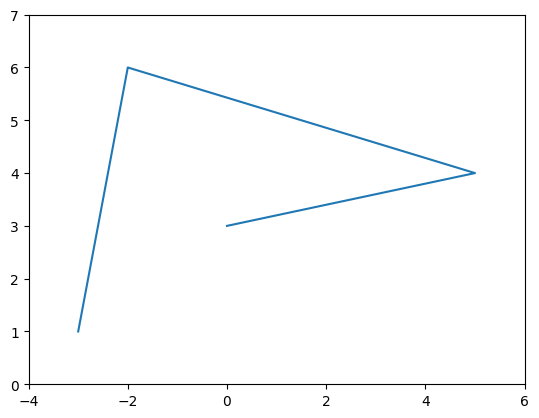

In [4]:
plt.plot([-3, -2, 5, 0], [1, 6, 4, 3])
plt.axis([-4, 6, 0, 7])
plt.show()

Now, let's plot a mathematical function. We use NumPy's `linspace` function to create an array `x` containing 500 floats ranging from -2 to 2, then we create a second array `y` computed as the square of `x`

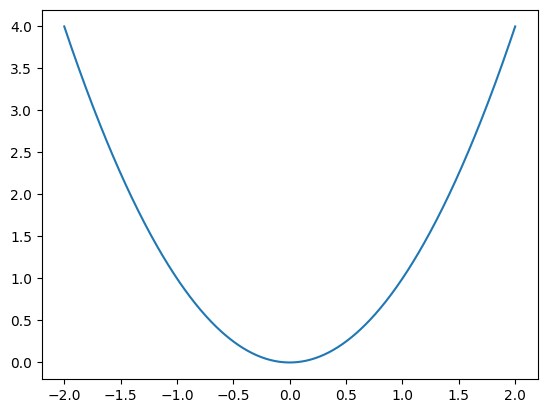

In [5]:
import numpy as np
x = np.linspace(-2, 2, 500)
y = x**2
plt.plot(x, y)
plt.show()

That's a bit dry, let's add a title, and x and y labels, and draw a grid.

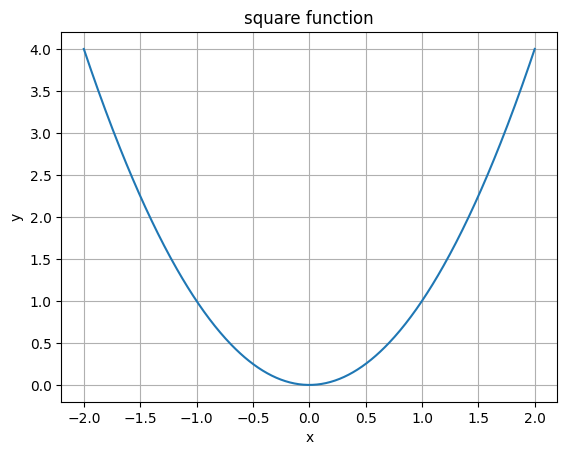

In [6]:
plt.plot(x, y)
plt.title("square function")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Line style and color
By default, matplotlib draws a line between consecutive points.

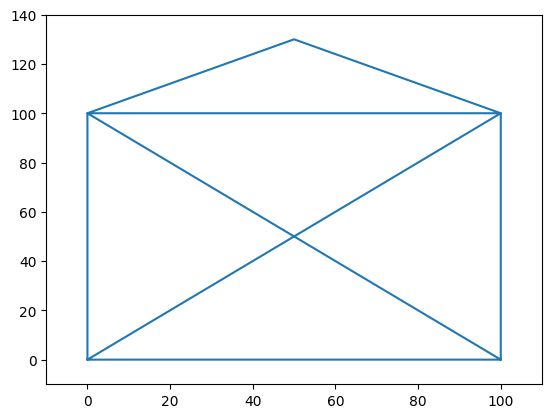

In [7]:
plt.plot([0, 100, 100, 0, 0, 100, 50, 0, 100], [0, 0, 100, 100, 0, 100, 130, 100, 0])
plt.axis([-10, 110, -10, 140])
plt.show()

You can pass a 3rd argument to change the line's style and color. For example `"g--"` means "green dashed line".

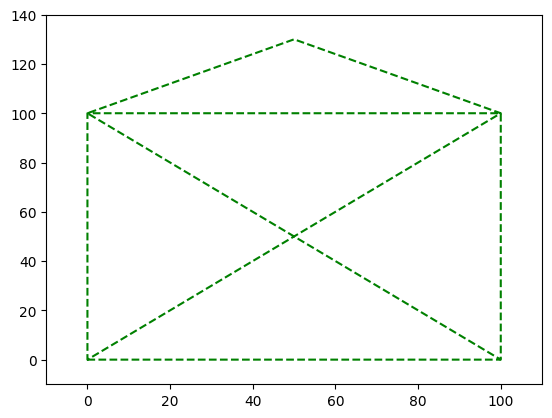

In [8]:
plt.plot([0, 100, 100, 0, 0, 100, 50, 0, 100], [0, 0, 100, 100, 0, 100, 130, 100, 0], "g--")
plt.axis([-10, 110, -10, 140])
plt.show()

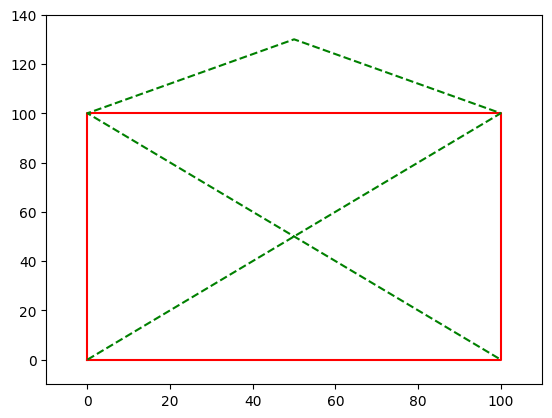

In [9]:
plt.plot([0, 100, 100, 0, 0], [0, 0, 100, 100, 0], "r-", [0, 100, 50, 0, 100], [0, 100, 130, 100, 0], "g--")
plt.axis([-10, 110, -10, 140])
plt.show()

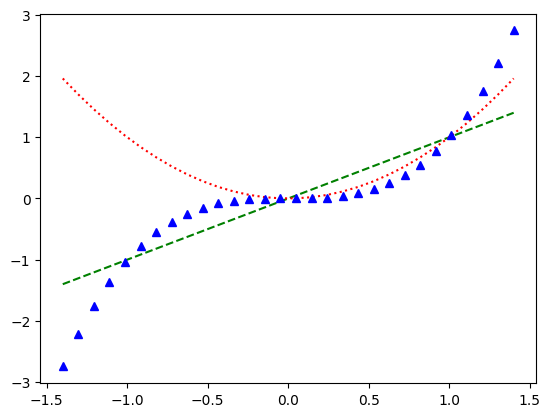

In [10]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x, 'g--', x, x**2, 'r:', x, x**3, 'b^')
plt.show()

The plot function returns a list of `Line2D` objects (one for each line). You can set extra attributes on these lines, such as the line width, the dash style or the alpha level.

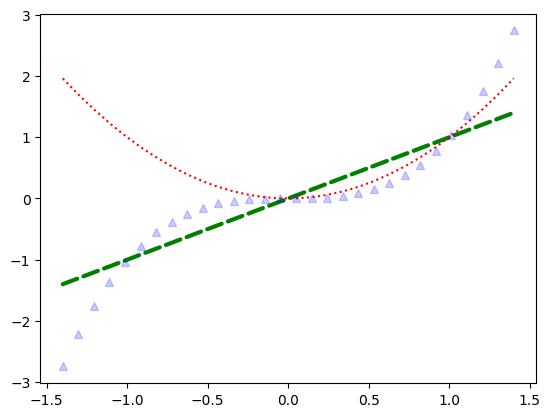

In [11]:
x = np.linspace(-1.4, 1.4, 30)
line1, line2, line3 = plt.plot(x, x, 'g--', x, x**2, 'r:', x, x**3, 'b^')
line1.set_linewidth(3.0)
line1.set_dash_capstyle("round")
line3.set_alpha(0.2)
plt.show()

## Saving a figure
Saving a figure to disk is as simple as calling `savefig` with the name of the file (or a file object). The available image formats depend on the graphics backend you use.

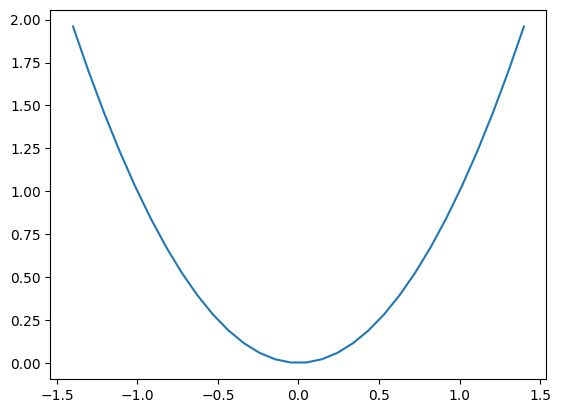

In [12]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x**2)
plt.savefig("my_square_function.png", transparent=True)

## Subplots
A matplotlib figure may contain multiple subplots. These subplots are organized in a grid. To create a subplot, just call the `subplot` function, and specify the number of rows and columns in the figure, and the index of the subplot you want to draw on (starting from 1, then left to right, and top to bottom). Note that pyplot keeps track of the currently active subplot (which you can get a reference to by calling `plt.gca()`), so when you call the `plot` function, it draws on the active subplot.

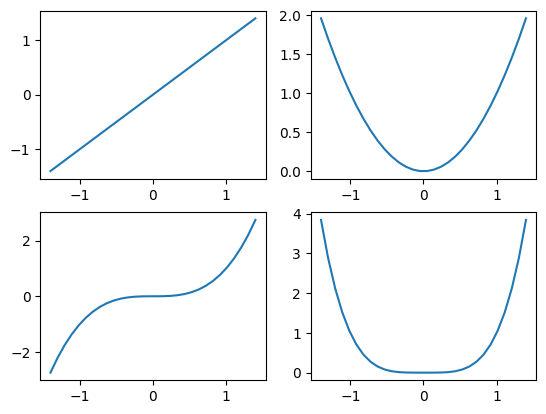

In [13]:
x = np.linspace(-1.4, 1.4, 30)
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
plt.plot(x, x)
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2)
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot = bottow left
plt.plot(x, x**3)
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot = bottom right
plt.plot(x, x**4)
plt.show()

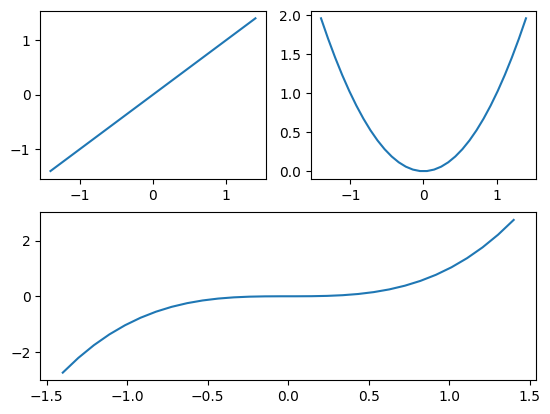

In [14]:
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
plt.plot(x, x)
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2)
plt.subplot(2, 1, 2)  # 2 rows, *1* column, 2nd subplot = bottom
plt.plot(x, x**3)
plt.show()

If you need more complex subplot positionning, you can use `subplot2grid` instead of `subplot`. You specify the number of rows and columns in the grid, then your subplot's position in that grid (top-left = (0,0)), and optionally how many rows and/or columns it spans. For example:

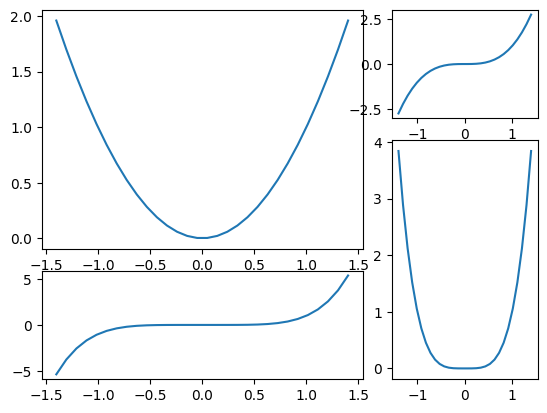

In [15]:
plt.subplot2grid((3,3), (0, 0), rowspan=2, colspan=2)
plt.plot(x, x**2)
plt.subplot2grid((3,3), (0, 2))
plt.plot(x, x**3)
plt.subplot2grid((3,3), (1, 2), rowspan=2)
plt.plot(x, x**4)
plt.subplot2grid((3,3), (2, 0), colspan=2)
plt.plot(x, x**5)
plt.show()


## Multiple figures
It is also possible to draw multiple figures. Each figure may contain one or more subplots. By default, matplotlib creates `figure(1)` automatically. When you switch figure, pyplot keeps track of the currently active figure (which you can get a reference to by calling `plt.gcf()`), and the active subplot of that figure becomes the current subplot.

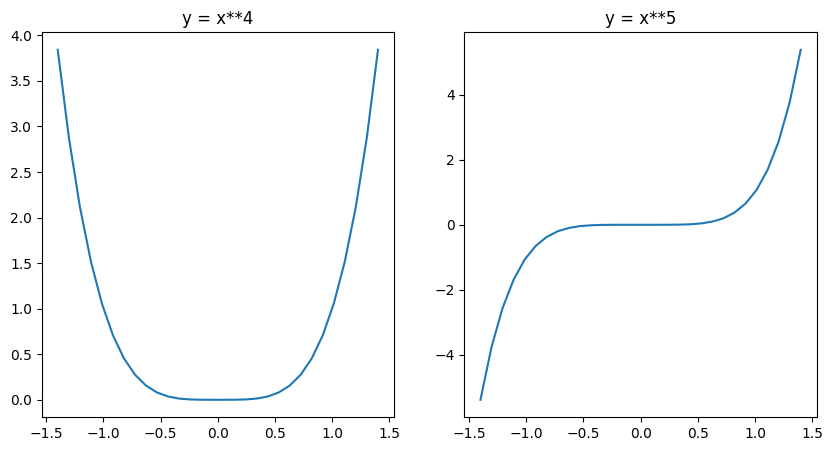

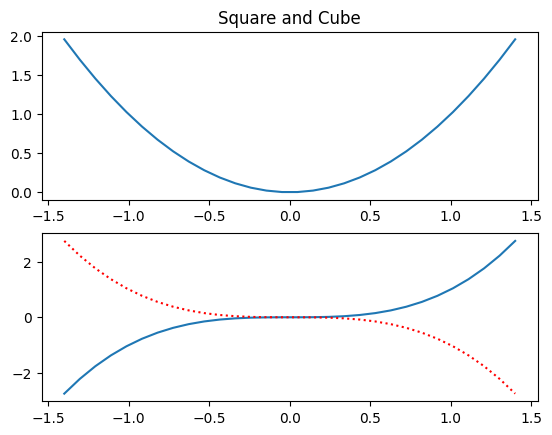

In [16]:
x = np.linspace(-1.4, 1.4, 30)

plt.figure(1)
plt.subplot(211)
plt.plot(x, x**2)
plt.title("Square and Cube")
plt.subplot(212)
plt.plot(x, x**3)

plt.figure(2, figsize=(10, 5))
plt.subplot(121)
plt.plot(x, x**4)
plt.title("y = x**4")
plt.subplot(122)
plt.plot(x, x**5)
plt.title("y = x**5")

plt.figure(1)      # back to figure 1, current subplot is 212 (bottom)
plt.plot(x, -x**3, "r:")

plt.show()


## Pyplot's state machine: implicit vs explicit

Pyplot’s implicit state machine is handy for quick plots since it remembers the active figure and axes, but it can get confusing in larger programs. The explicit object-oriented style `(fig, ax = plt.subplots())` makes you specify where to plot, which is clearer, easier to debug, and better for maintainable code.

In [17]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


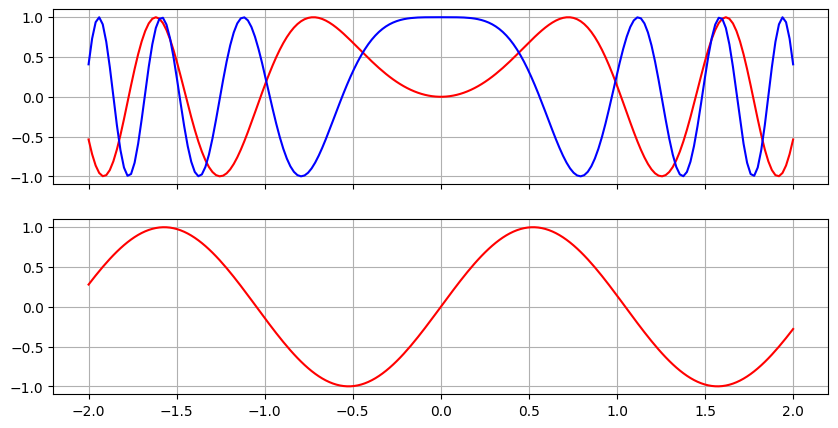

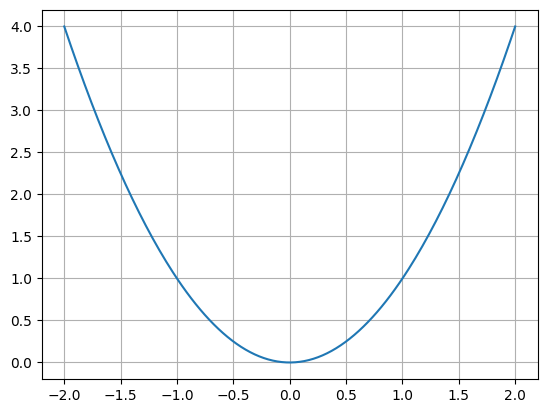

In [18]:
x = np.linspace(-2, 2, 200)
fig1, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
fig1.set_size_inches(10,5)
line1, line2 = ax_top.plot(x, np.sin(3*x**2), "r-", x, np.cos(5*x**2), "b-")
line3, = ax_bottom.plot(x, np.sin(3*x), "r-")
ax_top.grid(True)
ax_bottom.grid(True)

fig2, ax = plt.subplots(1, 1)
ax.plot(x, x**2)
ax.grid(True)
plt.show()

## Drawing text
You can call `text` to add text at any location in the graph. Just specify the horizontal and vertical coordinates and the text, and optionally some extra attributes. Any text in matplotlib may contain TeX equation expressions.


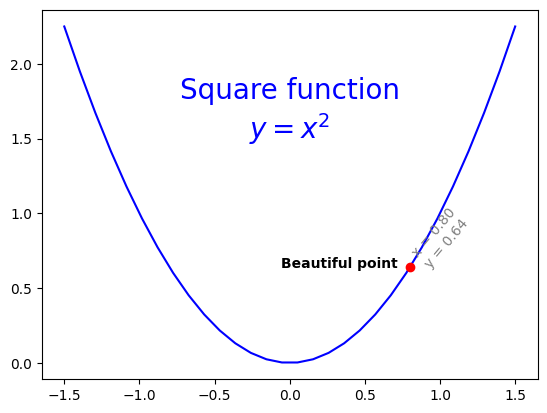

In [19]:
x = np.linspace(-1.5, 1.5, 30)
px = 0.8
py = px**2

plt.plot(x, x**2, "b-", px, py, "ro")

plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize = 20, color="blue", horizontalalignment = "center")
plt.text(px - 0.08, py, "Beautiful point", ha="right", weight="heavy")
plt.text(px, py, "x = %0.2f\ny = %0.2f"%(px,py), rotation = 50, color = 'gray' )
plt.show()

 * Note: `ha` is an alias for `horizontalalignment`

It is quite frequent to annotate elements of a graph, such as the beautiful point above. The `annotate` function makes this easy: just indicate the location of the point of interest, and the position of the text, plus optionally some extra attributes for the text and the arrow.

Text(-0.5, 1.1400000000000001, 'Beaitiful Point')

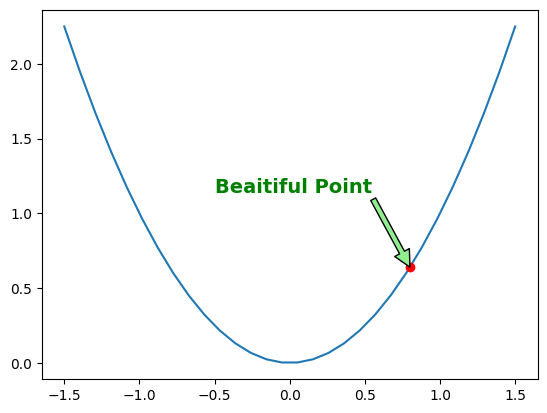

In [20]:
plt.plot(x,x**2, px, py, "ro" )
plt.annotate("Beaitiful Point",
            xy=(px, py),
            xytext=(px-1.3, py+0.5),
            color="green",
            weight="heavy",
            fontsize=14,
            arrowprops={"facecolor":"lightgreen"})

You can also add a bounding box around your text by using the `bbox` attribute:

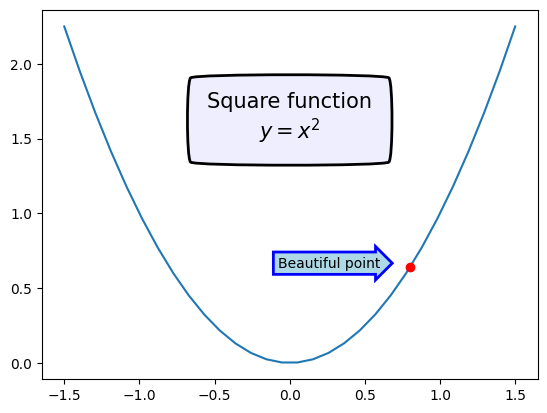

In [21]:
plt.plot(x, x**2, px, py, "ro")
bbox_props = dict(boxstyle="rarrow , pad=0.3", ec="b", lw=2, fc="lightblue")
plt.text(px-0.2, py, "Beautiful point", bbox=bbox_props, ha = "right")

bbox_props = dict(boxstyle= "round4, pad=1, rounding_size = 0.2", ec="black", fc="#EEEEFF", lw=2)
plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=15, color='black', ha="center", bbox=bbox_props)
plt.show()

## Legends
The simplest way to add a legend is to set a label on all lines, then just call the `legend` function.

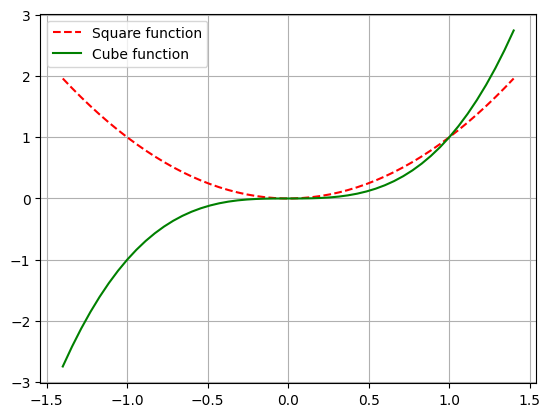

In [22]:
x = np.linspace(-1.4, 1.4, 50)
plt.plot(x, x**2, "r--", label="Square function")
plt.plot(x, x**3, "g-", label="Cube function")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Non linear scales
Matplotlib supports non linear scales, such as logarithmic or logit scales.

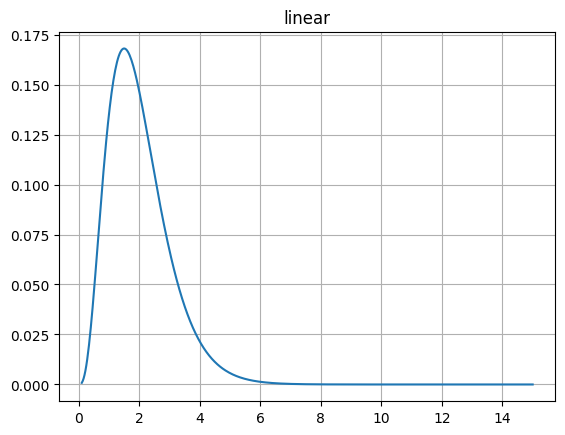

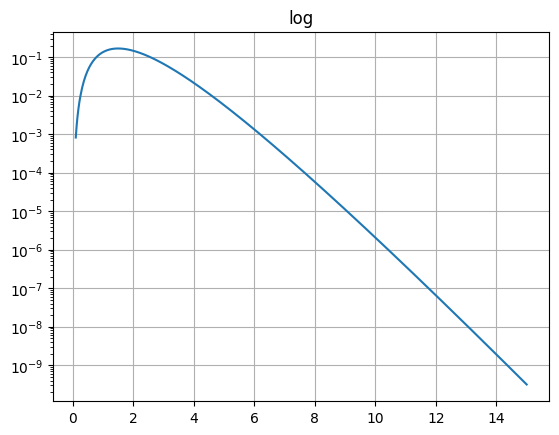

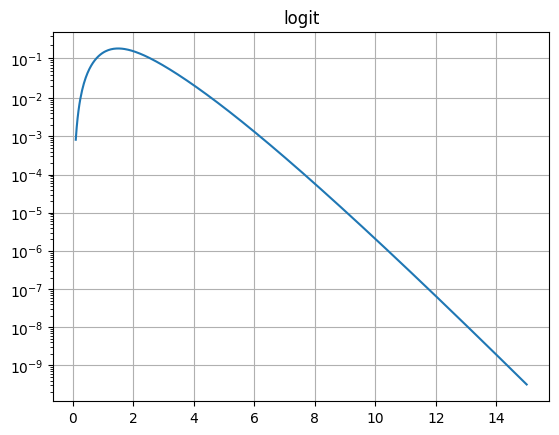

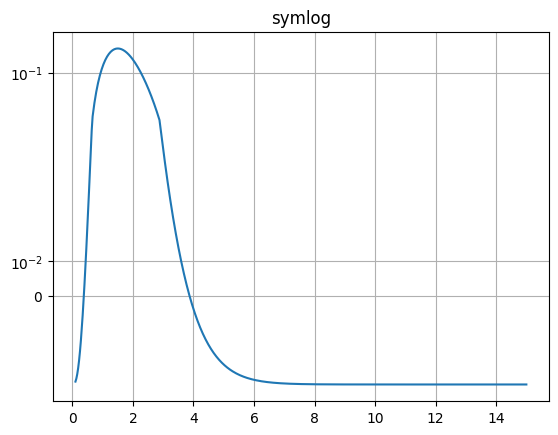

In [23]:
x = np.linspace(0.1, 15, 500)
y = x**3/np.exp(2*x)

plt.figure(1)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

plt.figure(2)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

plt.figure(3)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)

plt.figure(4)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.05)
plt.title('symlog')
plt.grid(True)

plt.show()

## Ticks and Tickers 
"`ticks`" refer to the marks on the axes, while "`tickers`" are objects that determine the placement of these marks.

- `Ticks`: Marks on the axes (e.g., (-1, 0, 1))
- `Tick lines`: Small lines drawn at tick locations
- `Tick labels`: Labels drawn next to tick lines
- `Tickers`: Objects that decide where to place ticks


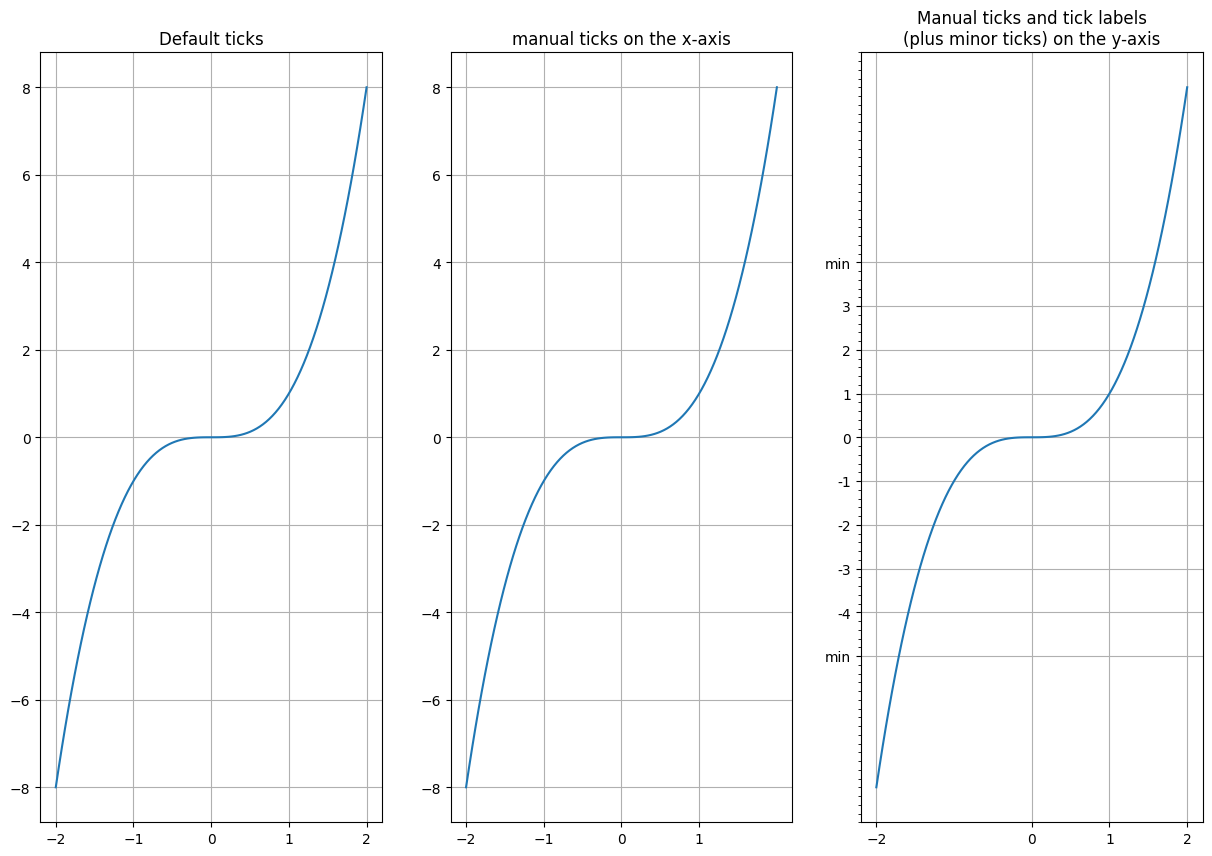

In [24]:
x = np.linspace(-2, 2, 100)

plt.figure(1,figsize=(15,10))
plt.subplot(131)
plt.plot(x, x**3)
plt.grid(True)
plt.title("Default ticks") 

ax = plt.subplot(132)
plt.plot(x, x**3)
ax.xaxis.set_ticks(np.arange(-2, 2, 1))
plt.grid(True)
plt.title("manual ticks on the x-axis")

ax = plt.subplot(133)
plt.plot(x, x**3)
plt.minorticks_on()
ax.tick_params(axis='x', which='minor', bottom=False)
ax.xaxis.set_ticks([-2,0,1,2])
ax.yaxis.set_ticks(np.arange(-5,5, 1))
ax.yaxis.set_ticklabels(['min', -4, -3, -2, -1, 0, 1, 2, 3, "min"])
plt.title("Manual ticks and tick labels\n(plus minor ticks) on the y-axis")
plt.grid()

plt.show()

## Polar projection
Drawing a polar graph is as easy as setting the `projection` attribute to "`polar`" when creating the subplot.

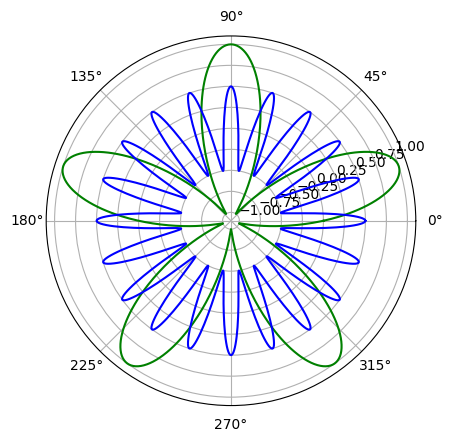

In [25]:
radius = 1
theta = np.linspace(0, 2*np.pi*radius, 1000)

plt.subplot(111, projection='polar')
plt.plot(theta, np.sin(5*theta), "g-")
plt.plot(theta, 0.5*np.cos(20*theta), "b-")

## 3D projection
Plotting 3D graphs is quite straightforward. You need to import `Axes3D`, which registers the "`3d`" projection. Then create a subplot setting the `projection` to "`3d`". This returns an `Axes3DSubplot` object, which you can use to call `plot_surface`, giving x, y, and z coordinates, plus optional attributes.

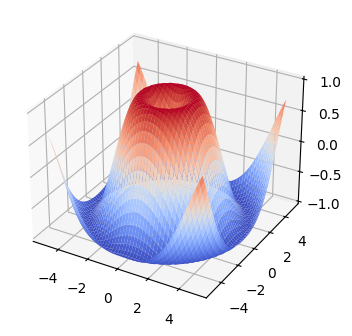

In [26]:
from mpl_toolkits.mplot3d import Axes3D
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

figure = plt.figure(1, figsize =(12, 4))
subplot3d = plt.subplot(111, projection="3d")
surface = subplot3d.plot_surface(X, Y , Z, rstride =1, cstride =1, cmap =matplotlib.cm.coolwarm, linewidth=0.1)
plt.show()

Another way to display this same data is via a contour plot.

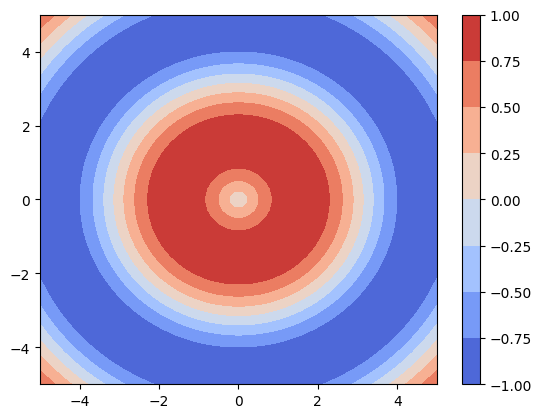

In [27]:
plt.contourf(X, Y, Z, cmap=matplotlib.cm.coolwarm)
plt.colorbar()
plt.show()

## Scatter plot
To draw a scatter plot, simply provide the x and y coordinates of the points.

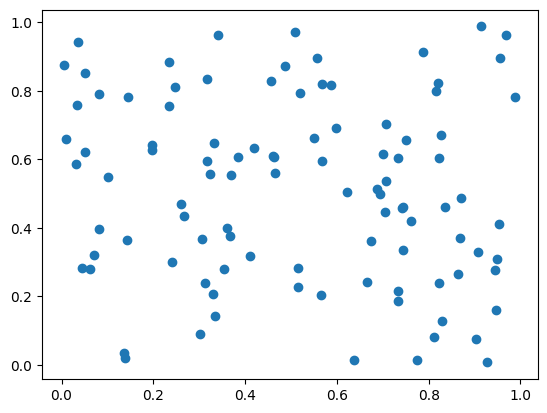

In [28]:
from numpy.random import rand
x, y = rand(2, 100)
plt.scatter(x, y)
plt.show()

You may also optionally provide the scale of each point.

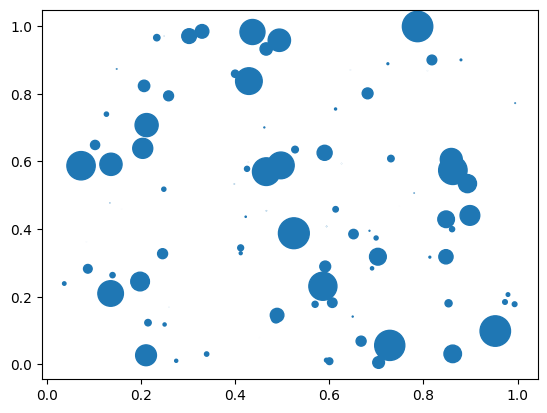

In [29]:
x, y, scale = rand(3, 100)
scale = 500 * scale ** 5
plt.scatter(x, y, s=scale)
plt.show()

And as usual there are a number of other attributes you can set, such as the fill and edge colors and the alpha level.

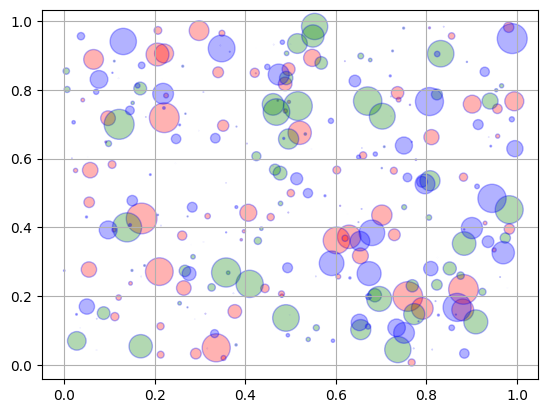

In [30]:
for color in ['red', 'green', 'blue']:
    n = 100
    x, y = rand(2, n)
    scale = 500.0 * rand(n) ** 5
    plt.scatter(x, y, s=scale, c=color, alpha=0.3, edgecolors='blue')

plt.grid(True)

plt.show()

## Lines
You can draw lines simply using the `plot` function, as we have done so far. However, it is often convenient to create a utility function that plots a (seemingly) infinite line across the graph, given a slope and an intercept. You can also use the `hlines` and `vlines` functions that plot horizontal and vertical line segments. For example:

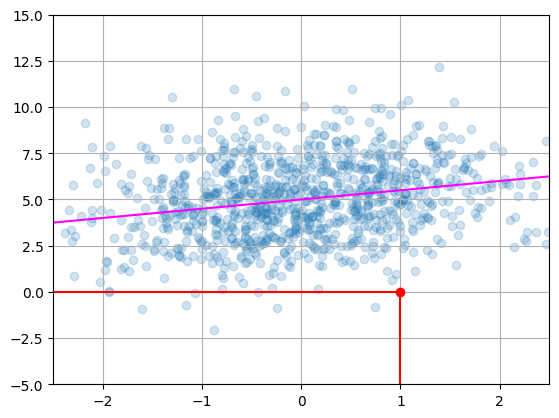

In [31]:
from numpy.random import randn
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

x = randn(1000)
y = 0.5*x + 5 + randn(1000)*2
plt.axis([-2.5, 2.5, -5, 15])
plt.scatter(x, y , alpha = 0.2)
plt.plot(1, 0 , "ro")
plt.vlines(1, -5, 0 , color = "red")
plt.hlines(0, -2.5, 1, color= "red")
plot_line(axis=plt.gca(), slope=0.5, intercept=5, color="magenta")

plt.grid()
plt.show()

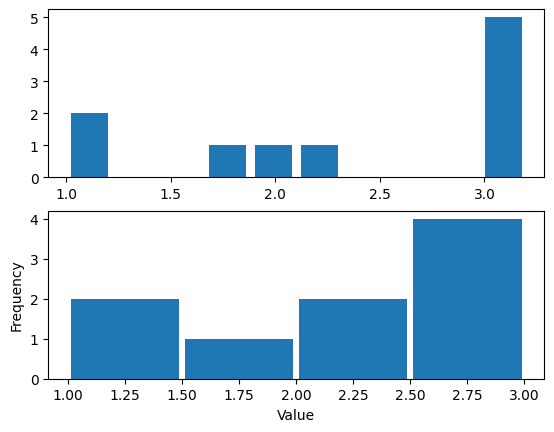

In [32]:
data = [1, 1.1, 1.8, 2, 2.1, 3.2, 3, 3, 3, 3]
plt.subplot(211)
plt.hist(data, bins = 10, rwidth=0.8)

plt.subplot(212)
plt.hist(data, bins = [1, 1.5, 2, 2.5, 3], rwidth=0.95)
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

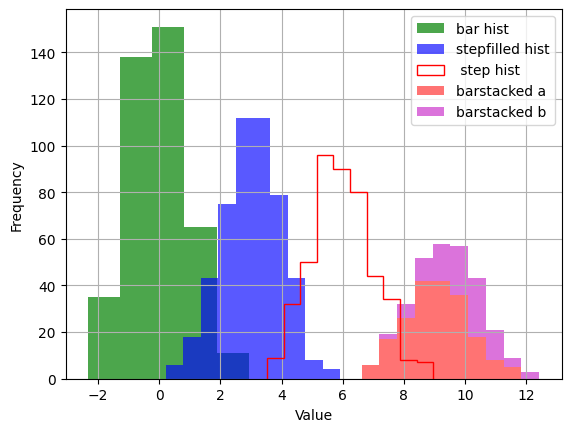

In [33]:
data1 = np.random.randn(400)
data2 = np.random.randn(500) + 3
data3 = np.random.randn(450) + 6
data4a = np.random.randn(200) + 9
data4b = np.random.randn(100) + 10
plt.hist(data1, bins = 5 , color= 'g', alpha = 0.7, label = 'bar hist')
plt.hist(data2 , color="b", alpha = 0.65, histtype = 'stepfilled', label = 'stepfilled hist')
plt.hist(data3, color = "r", histtype = "step", label = ' step hist')
plt.hist((data4a, data4b), color=('r','m'), alpha=0.55, histtype='barstacked', label=('barstacked a', 'barstacked b'))

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

## Images
Reading, generating and plotting images in matplotlib is quite straightforward.

To read an image, just import the `matplotlib.image` module, and call its `imread` function, passing it the file name (or file object). This returns the image data, as a NumPy array. Let's try this with the `my_square_function.png` image we saved earlier.

In [34]:
import matplotlib.image as mpimg
img = mpimg.imread('my_square_function.png')
print(img.shape, img.dtype)

(480, 640, 4) float32


We have loaded a 480x640 image. Each pixel is represented by a 4-element array: red, green, blue, and alpha levels, as 32-bit floats between 0 and 1. Now all we need to do is to call `imshow`:

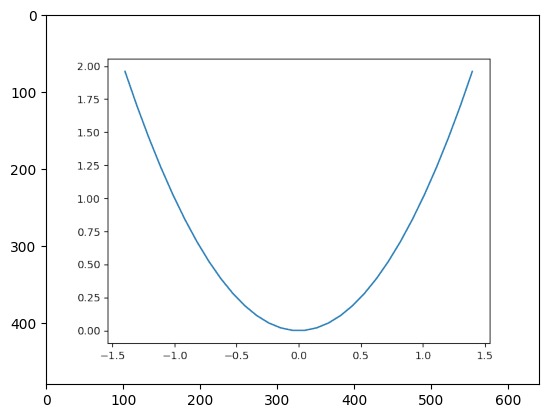

In [35]:
plt.imshow(img)
plt.show()

You may want to hide the axes when you are displaying an image:

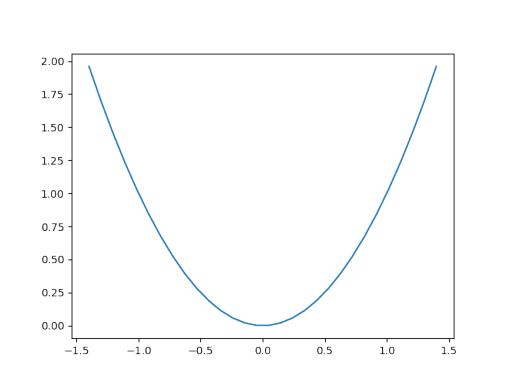

In [36]:
plt.imshow(img)
plt.axis('off')
plt.show()

It's just as easy to generate your own image:

[[   0    1    2 ...   97   98   99]
 [ 100  101  102 ...  197  198  199]
 [ 200  201  202 ...  297  298  299]
 ...
 [9700 9701 9702 ... 9797 9798 9799]
 [9800 9801 9802 ... 9897 9898 9899]
 [9900 9901 9902 ... 9997 9998 9999]]


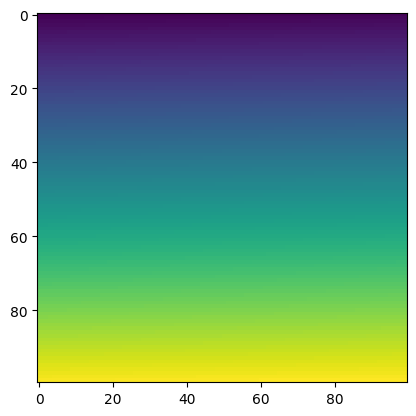

In [37]:
img = np.arange(100*100).reshape(100, 100)
print(img)
plt.imshow(img)
plt.show()

As we did not provide RGB levels, the `imshow` function automatically maps values to a color gradient. By default, the color gradient goes from blue (for low values) to red (for high values), but you can select another color map. For example:

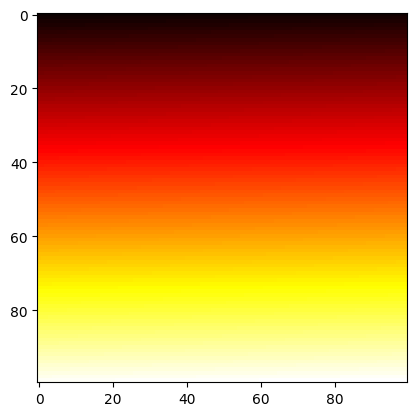

In [38]:
plt.imshow(img, cmap = "hot")
plt.show()

You can also generate an RGB image directly:

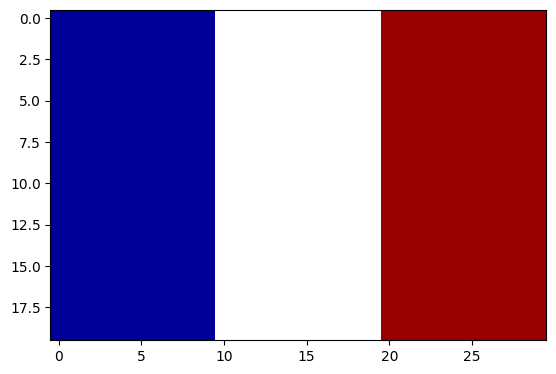

In [39]:
img = np.empty((20, 30, 3 ))
img[:, :10] =  [0, 0, 0.6]
img[:, 10:20] = [1, 1, 1]
img[:, 20:] = [0.6, 0, 0]
plt.imshow(img)
plt.show()

you can use a different `interpolation` method, such as bilinear interpolation to fill the blank pixels. This leads to blurry edges, which many be nicer in some cases:

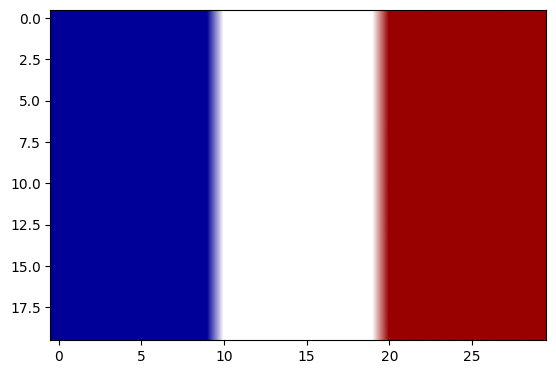

In [40]:
plt.imshow(img, interpolation="bilinear")
plt.show()

## Animations
Although matplotlib is mostly used to generate images, it is also capable of displaying animations. First, you need to import `matplotlib.animation` :

In [41]:
import matplotlib.animation as animation

In the following example, we start by creating data points, then we create an empty plot, we define the update function that will be called at every iteration of the animation, and finally we add an animation to the plot by creating a `FuncAnimation` instance.

The `FuncAnimation` constructor takes a figure, an update function and optional arguments. We specify that we want a 50-frame long animation, with 100ms between each frame. At each iteration, `FuncAnimation` calls our update function and passes it the frame number num (from 0 to 49 in our case) followed by the extra arguments that we specified with `fargs`.

Our update function simply sets the line data to be the first num data points (so the data gets drawn gradually), and just for fun we also add a small random number to each data point so that the line appears to wiggle.

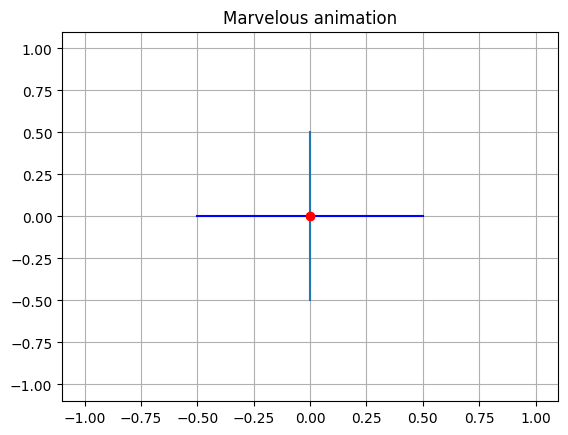

In [42]:
x  = np.linspace(-1, 1, 100)
y = np.sin(x**2*25)
data = np.array([x, y])

fig = plt.figure()
line, = plt.plot([], [], "r-")
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.plot([-0.5, 0.5], [0, 0], "b-", [0,0], [ -0.5, 0.5], 0, 0, "ro")
plt.grid(True)
plt.title("Marvelous animation")

# this function will be called at every iteration
def update_line(num, data, line):
    line.set_data(data[0][:num], data[1][:num] + np.random.rand(num)/25)
    return line,

line_ani = animation.FuncAnimation(fig, update_line, frames=50, fargs=(data, line), interval=100)
plt.show()

Next, let's display the animation. One option is to convert it to HTML5 code (using a `<video>` tag), and render this code using `IPython.display.HTML`:


Alternatively, we can display the animation using a nice little HTML/Javascript interactive widget:

In [43]:
from IPython.display import HTML
HTML(line_ani.to_jshtml())

After that, you don't even need to use `IPython.display.HTML` anymore:


In [44]:
animation.FuncAnimation(fig, update_line, frames=50, fargs=(data, line), interval=100)

Once Loop Reflect

**Warning**: if you save the notebook along with its outputs, then the animations will take up a lot of space.

## Saving animations to video file 
To save the animation to the GIF format.

In [45]:
line_ani.save("my_wiggly_animation.gif", writer="pillow", fps=15)

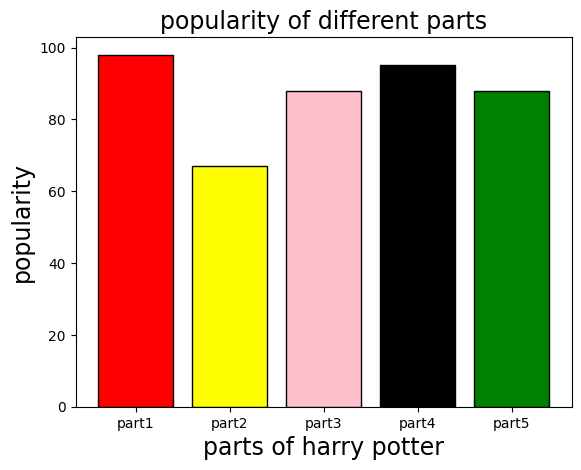

In [46]:
import matplotlib.pyplot as plt
y = [98,67,88,95,88]
x = ["part1","part2","part3","part4","part5"]
color = ["red","yellow","pink","black","green"]
plt.bar(x,y,color= color,edgecolor ="black")
plt.xlabel("parts of harry potter",fontsize =17)
plt.ylabel("popularity", fontsize = 17)
plt.title("popularity of different parts", fontsize = 17)
plt.show()

         Date    Category       Sub-Category   Amount Payment Mode
0  2023-01-01     Grocery             Grocery      30         Cash
1  2023-01-02        Food          Restaurant     890          UPI
2  2023-01-04        Food              Zomato     257          NaN
3  2023-01-06  Essentials               Diary     120          UPI
4  2023-01-06  Essentials             Perfume    1500         Cash
5  2023-01-09     Grocery  Fruits and Veggies     456         Cash
6  2023-01-10       Bills          House Rent   16000          UPI
7  2023-01-10     Grocery      Tomato KetchUp      70          UPI
8  2023-01-12        Food                Chai      15          UPI
9  2023-01-15  Essentials      Salt and Sugar      50          NaN
10 2023-01-17     Grocery           Chocolate     100          UPI
11 2023-01-17        Food          Restaurant     780         Card
12 2023-01-18  Essentials            Food Oil     120          NaN
13 2023-01-18        Food              Zomato     230         

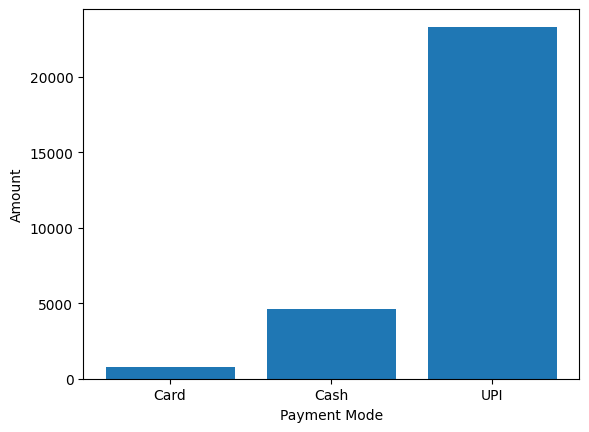

In [75]:
import pandas as  pd 
import matplotlib.pyplot as plt
data = pd.read_excel("C:/Users/Shubham/Downloads/Excel course/datasets/expense.xlsx")
df = pd.DataFrame(data)
print(df)
# Ensure Payment Mode is a string and handle NaN values
#df["Payment Mode"] = df["Payment Mode"].astype(str).fillna("Unknown")

# Ensure Amount is numeric
#df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce").fillna(0)
grouped_by = df.groupby("Payment Mode")["Amount"].sum()
print(grouped_by)
plt.bar(grouped_by.index,grouped_by.values)
# Plot
#plt.bar(df["Payment Mode"], df["Amount"])
plt.xlabel("Payment Mode")
plt.ylabel("Amount")
plt.show()

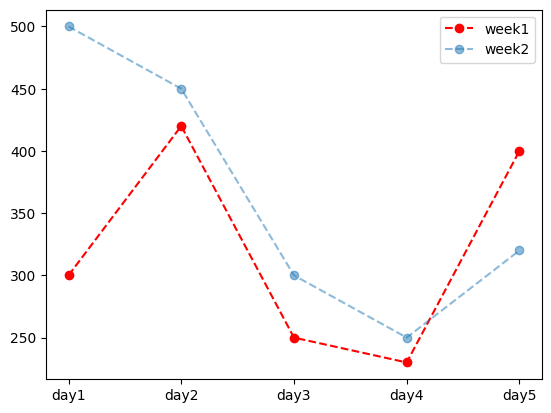

In [48]:
#line plot matplotlib
import  matplotlib.pyplot as plt
x = ["day1","day2","day3","day4","day5"]
y = [300,420,250,230,400]
y1 = [500,450,300,250,320]
plt.plot(x,y,marker = "o",ls = "--",color = "red", label = "week1")
plt.plot(x,y1,marker = "o",ls = "--",label = "week2",alpha = 0.5)
plt.legend()
plt.show()

Category
Bills         18724
Clothes        2890
Essentials     4485
Food           3022
Grocery        1028
Name: Amount, dtype: int64
         Date    Category       Sub-Category   Amount Payment Mode
0  2023-01-01     Grocery             Grocery      30         Cash
1  2023-01-02        Food          Restaurant     890          UPI
2  2023-01-04        Food              Zomato     257          NaN
3  2023-01-06  Essentials               Diary     120          UPI
4  2023-01-06  Essentials             Perfume    1500         Cash
5  2023-01-09     Grocery  Fruits and Veggies     456         Cash
6  2023-01-10       Bills          House Rent   16000          UPI
7  2023-01-10     Grocery      Tomato KetchUp      70          UPI
8  2023-01-12        Food                Chai      15          UPI
9  2023-01-15  Essentials      Salt and Sugar      50          NaN
10 2023-01-17     Grocery           Chocolate     100          UPI
11 2023-01-17        Food          Restaurant     780       

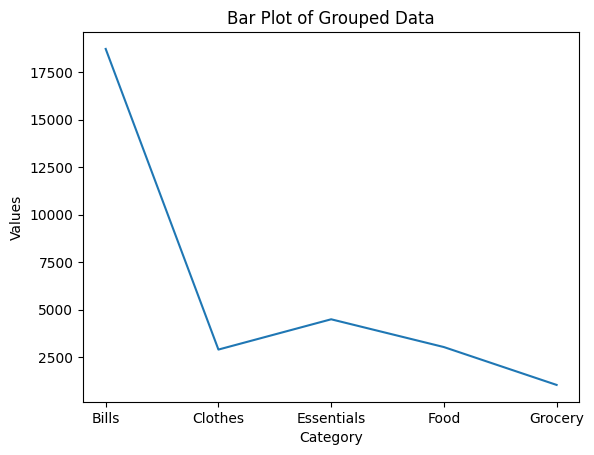

In [49]:
import pandas  as pd 
import matplotlib.pyplot as plt


data = pd.read_excel("C:/Users/Shubham/Downloads/Excel course/datasets/expense.xlsx")
df = pd.DataFrame(data)
grouped_by = df.groupby("Category")["Amount"].sum()
print(grouped_by)
plt.plot(grouped_by.index.astype(str),grouped_by.values)
print(df)

# Labels and title for the plot
plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Bar Plot of Grouped Data')

# Show the plot
plt.show()

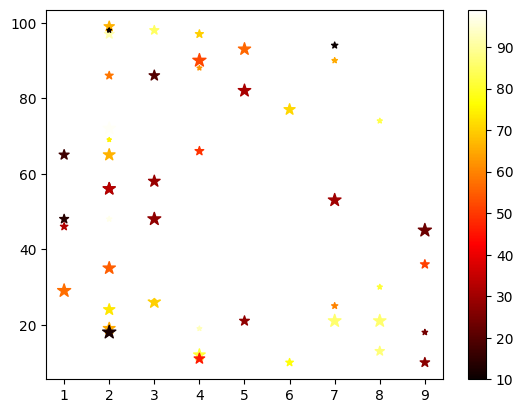

In [50]:
#scatter plot
import matplotlib.pyplot as ptl
import numpy as np

x = np.random.randint(1,10,50)
y = np.random.randint(10,100,50)   
color =np.random.randint(10,100,50)
size =np.random.randint(10,100,50)
plt.scatter(x,y,marker ="*",cmap ="hot",c = color,s = size )
plt.colorbar()
plt.show()

       EEID        Full Name                 Job Title  Department  \
0    E02387      Emily Davis                Sr. Manger          IT   
1    E04105    Theodore Dinh       Technical Architect          IT   
2    E02572     Luna Sanders                  Director     Finance   
3    E02832  Penelope Jordan  Computer Systems Manager          IT   
4    E01639        Austin Vo               Sr. Analyst     Finance   
..      ...              ...                       ...         ...   
995  E03094     Wesley Young               Sr. Analyst   Marketing   
996  E01909     Lillian Khan                   Analyst     Finance   
997  E04398      Oliver Yang                  Director   Marketing   
998  E02521      Lily Nguyen               Sr. Analyst     Finance   
999  E03545      Sofia Cheng            Vice President  Accounting   

              Business Unit  Gender  Ethnicity  Age  Hire Date  Annual Salary  \
0    Research & Development  Female      Black   55 2016-04-08         141604 

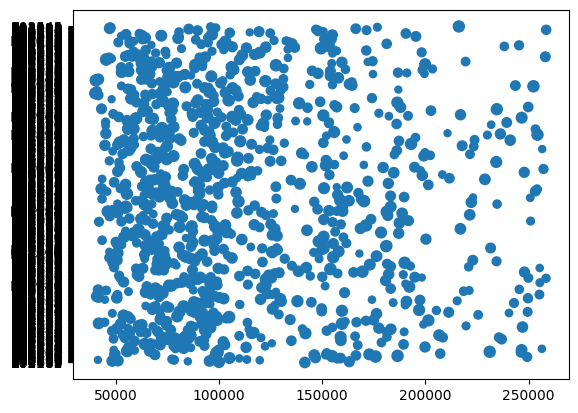

In [51]:
import matplotlib.pyplot as  plt
import pandas as pd
import numpy as np
data = pd.read_excel("C:/Users/Shubham/Downloads/Excel course/datasets/ESD.xlsx")
df = pd.DataFrame(data)
print(df)
plt.scatter(df["Annual Salary"],df["EEID"],s = df["Age"])
plt.show()

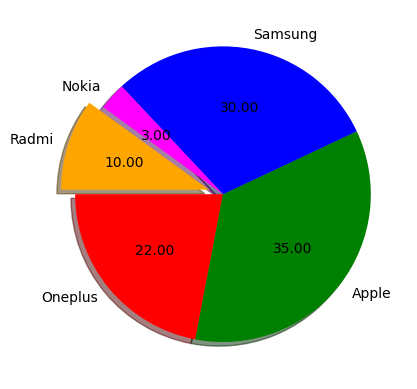

In [52]:
#pie plot
import matplotlib.pyplot as plt

brands = ["Oneplus","Apple","Samsung","Nokia","Radmi"]
x = [22,35,30,3,10]
c = ["red","green","blue","magenta","orange"]
ex =[0,0,0,0,0.1]

plt.pie(x,labels = brands,colors = c,explode = ex,shadow = True,autopct ="%.2f" , startangle = 180 )
plt.savefig("pie.png",pad_inches= 0.9,bbox_inches = "tight")
plt.show()

In [53]:
import pandas  as pd
import matplotlib.pyplot as plt
data = pd.read_excel("C:/Users/Shubham/Downloads/Excel course/datasets/expense.xlsx")
df = pd.DataFrame(data)
grouped_by = df.groupby("Payment Mode")["Amount"].sum()
print(grouped_by)
plt.pie(grouped_by.values,labels=grouped_by.index,autopct = "%.2f")
plt.show()
print(df)

Payment Mode
Card      780
Cash     4637
UPI     23305
Name: Amount, dtype: int64


         Date    Category       Sub-Category   Amount Payment Mode
0  2023-01-01     Grocery             Grocery      30         Cash
1  2023-01-02        Food          Restaurant     890          UPI
2  2023-01-04        Food              Zomato     257          NaN
3  2023-01-06  Essentials               Diary     120          UPI
4  2023-01-06  Essentials             Perfume    1500         Cash
5  2023-01-09     Grocery  Fruits and Veggies     456         Cash
6  2023-01-10       Bills          House Rent   16000          UPI
7  2023-01-10     Grocery      Tomato KetchUp      70          UPI
8  2023-01-12        Food                Chai      15          UPI
9  2023-01-15  Essentials      Salt and Sugar      50          NaN
10 2023-01-17     Grocery           Chocolate     100          UPI
11 2023-01-17        Food          Restaurant     780         Card
12 2023-01-18  Essentials            Food Oil     120          NaN
13 2023-01-18        Food              Zomato     230         

In [54]:
#box plot
import matplotlib.pyplot as plt 
my_list = [25,46,57,25,45,13,29,39,46,99,22,12,14,16,55,6,46,52,55]
plt.boxplot(my_list)
plt.show()


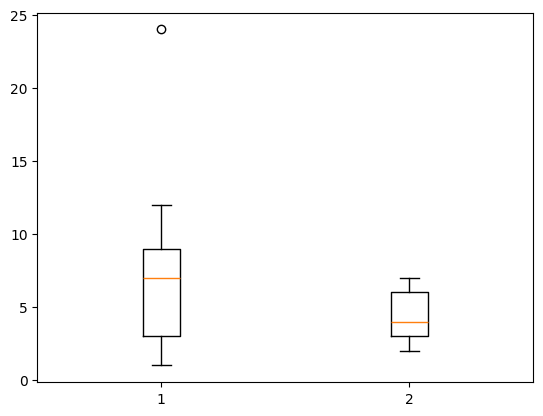

In [55]:
import matplotlib.pyplot as plt 
my_list = [1,3,4,7,12,2,8,9,24]
l1 = [2,3,4,6,3,5,7,3,6]

plot_values = [my_list,l1]
plt.boxplot(plot_values)
plt.show()

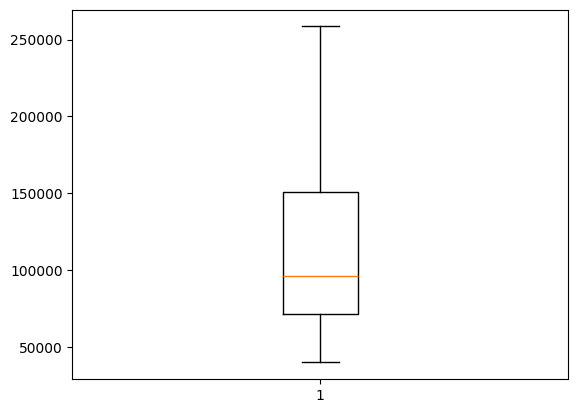

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_excel("C:/Users/Shubham/Downloads/Excel course/datasets/ESD.xlsx")
df = pd.DataFrame(data)

plt.boxplot(df["Annual Salary"])
plt.show()

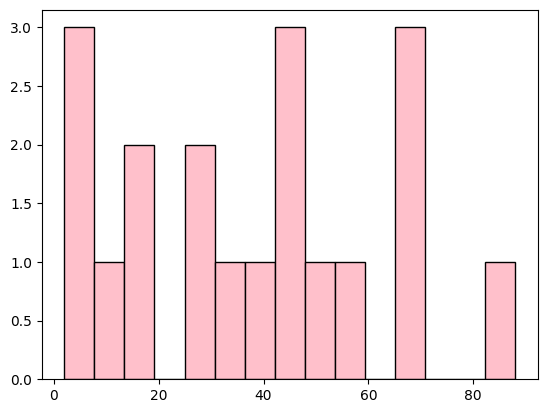

In [57]:
# histogram plot
import matplotlib.pyplot as plt
x = [30,40,68,27,47,59,47,88,44,66,66,33,5,2,5,50,12,17,16]
plt.hist(x,bins = 15 ,edgecolor = "black" ,color= "pink" )
plt.show()

       EEID        Full Name                 Job Title  Department  \
0    E02387      Emily Davis                Sr. Manger          IT   
1    E04105    Theodore Dinh       Technical Architect          IT   
2    E02572     Luna Sanders                  Director     Finance   
3    E02832  Penelope Jordan  Computer Systems Manager          IT   
4    E01639        Austin Vo               Sr. Analyst     Finance   
..      ...              ...                       ...         ...   
995  E03094     Wesley Young               Sr. Analyst   Marketing   
996  E01909     Lillian Khan                   Analyst     Finance   
997  E04398      Oliver Yang                  Director   Marketing   
998  E02521      Lily Nguyen               Sr. Analyst     Finance   
999  E03545      Sofia Cheng            Vice President  Accounting   

              Business Unit  Gender  Ethnicity  Age  Hire Date  Annual Salary  \
0    Research & Development  Female      Black   55 2016-04-08         141604 

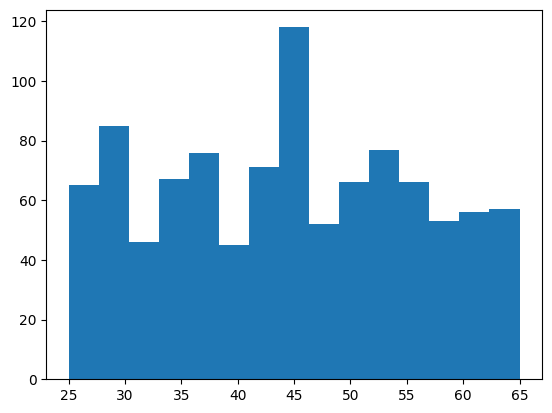

In [58]:
import pandas as pd    
import matplotlib.pyplot as plt
data = pd.read_excel("C:/Users/Shubham/Downloads/Excel course/datasets/ESD.xlsx")
df = pd.DataFrame(data)
print(df)
plt.hist(df["Age"],bins = 15)
plt.show()

In [59]:
#violin plot matplotlib
import matplotlib.pyplot as plt
a = [20,30,40,50,0,30,40,40,30,30,70,75,80,82,88,80,40,20]
plt.violinplot(a,showmedians = True)
plt.show()

In [60]:
import pandas as pd 
data = pd.read_excel("C:/Users/Shubham/Downloads/Excel course/datasets/ESD.xlsx")
df = pd.DataFrame(data)
# print(df)
plt.violinplot(df["Age"],showmedians=True)
plt.show()

In [61]:
import pandas as pd 
data = pd.read_excel("C:/Users/Shubham/Downloads/Excel course/datasets/ESD.xlsx")
df = pd.DataFrame(data)
# print(df)
plt.violinplot(df["Annual Salary"],showmedians=True)
plt.show()

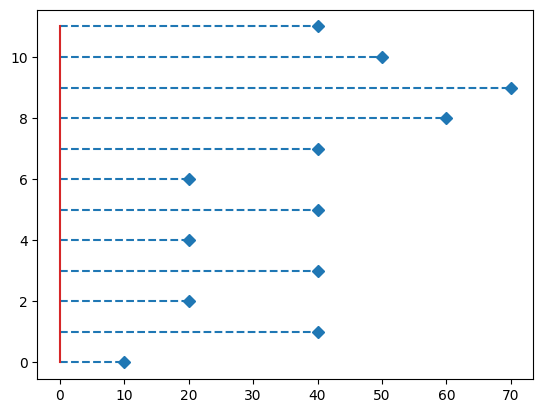

In [62]:
#stemplot
import matplotlib.pyplot as plt
x = [10,40,20,40,20,40,20,40,60,70,50,40]
plt.stem(x,linefmt="--",markerfmt = "D",orientation ="horizontal")
plt.show()

       EEID        Full Name                 Job Title  Department  \
0    E02387      Emily Davis                Sr. Manger          IT   
1    E04105    Theodore Dinh       Technical Architect          IT   
2    E02572     Luna Sanders                  Director     Finance   
3    E02832  Penelope Jordan  Computer Systems Manager          IT   
4    E01639        Austin Vo               Sr. Analyst     Finance   
..      ...              ...                       ...         ...   
995  E03094     Wesley Young               Sr. Analyst   Marketing   
996  E01909     Lillian Khan                   Analyst     Finance   
997  E04398      Oliver Yang                  Director   Marketing   
998  E02521      Lily Nguyen               Sr. Analyst     Finance   
999  E03545      Sofia Cheng            Vice President  Accounting   

              Business Unit  Gender  Ethnicity  Age  Hire Date  Annual Salary  \
0    Research & Development  Female      Black   55 2016-04-08         141604 

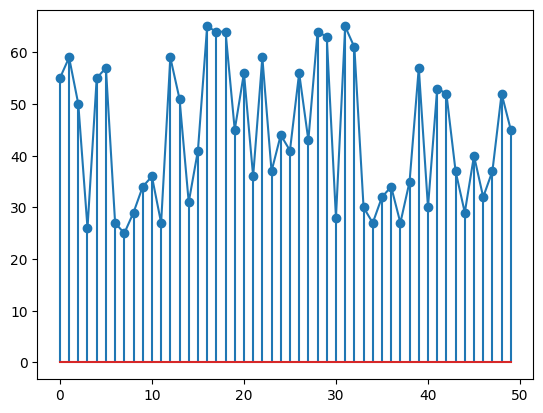

In [63]:
import pandas as pd 
data = pd.read_excel("C:/Users/Shubham/Downloads/Excel course/datasets/ESD.xlsx")
df = pd.DataFrame(data)
print(df)
df2 = (df.head(50))
plt.stem(df2["Age"])
plt.plot(df2["Age"])
plt.show()

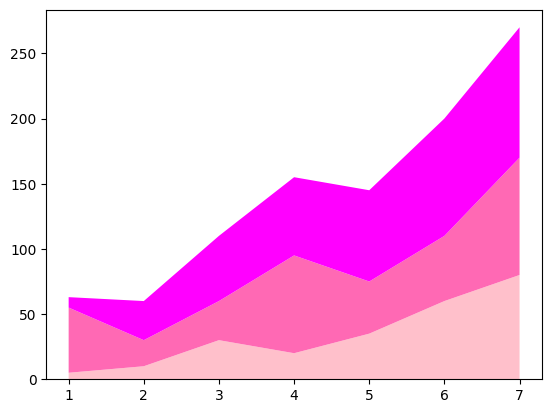

In [64]:
#stackplot
import matplotlib.pyplot as plt
days = [1,2,3,4,5,6,7,]
NOP1 = [5,10,30,20,35,60,80]
NOP2 = [50,20,30,75,40,50,90]
NOP3 = [8,30,50,60,70,90,100]

plt.stackplot(days,NOP1,NOP2,NOP3,colors = ["pink","hotpink","magenta"],labels = ["week1","week2","week3"])
plt.show()

In [65]:
import pandas as pd 
data = pd.read_csv("C:/Users/Shubham/Downloads/Excel course/datasets/food_data.csv")
df = pd.DataFrame(data)
print(df)

      Calories  Protein   Fat  Carbs  Fibre  Unnamed: 5  \
0           73      2.0   NaN   16.0    0.4         NaN   
1          129      3.0   NaN   29.0    0.1         NaN   
2           45      1.0   1.0    7.0    0.2         NaN   
3          206      2.0   4.0   39.0    1.8         NaN   
4          296      2.0  14.0   43.0    2.0         NaN   
...        ...      ...   ...    ...    ...         ...   
1089        22      2.0   NaN    4.0    2.4         NaN   
1090        63      3.0   NaN   13.0    2.8         NaN   
1091        51      3.0   NaN   11.0    2.7         NaN   
1092         6      NaN   NaN    1.0    0.4         NaN   
1093        15      1.0   NaN    4.0    1.3         NaN   

      Note: Protein, Fat, Carbs, Fibre, are measured in grams  
0                                                   NaN        
1                                                   NaN        
2                                                   NaN        
3                                  

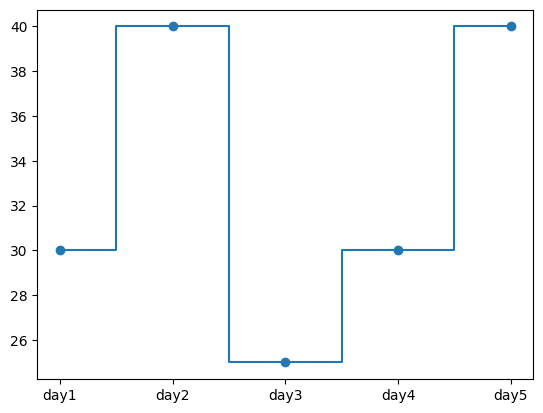

In [66]:
import matplotlib.pyplot as plt
x = ["day1","day2","day3","day4","day5"]
y = [30,40,25,30,40]

plt.step(x,y,where = "mid", marker ="o")
plt.show()

         Date    Category       Sub-Category   Amount Payment Mode
0  2023-01-01     Grocery             Grocery      30         Cash
1  2023-01-02        Food          Restaurant     890          UPI
2  2023-01-04        Food              Zomato     257          NaN
3  2023-01-06  Essentials               Diary     120          UPI
4  2023-01-06  Essentials             Perfume    1500         Cash
5  2023-01-09     Grocery  Fruits and Veggies     456         Cash
6  2023-01-10       Bills          House Rent   16000          UPI
7  2023-01-10     Grocery      Tomato KetchUp      70          UPI
8  2023-01-12        Food                Chai      15          UPI
9  2023-01-15  Essentials      Salt and Sugar      50          NaN
10 2023-01-17     Grocery           Chocolate     100          UPI
11 2023-01-17        Food          Restaurant     780         Card
12 2023-01-18  Essentials            Food Oil     120          NaN
13 2023-01-18        Food              Zomato     230         

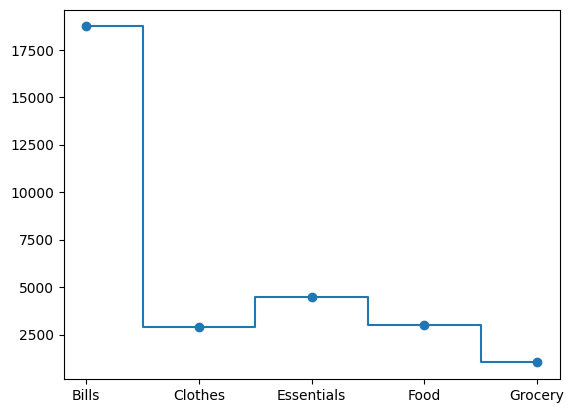

In [67]:
import pandas as pd
data = pd.read_excel("C:/Users/Shubham/Downloads/Excel course/datasets/expense.xlsx")
df = pd.DataFrame(data)
print(df)
group = df.groupby("Category").agg({"Amount":"sum"})
print(group)
plt.step(group.index,group["Amount"],where = "mid", marker ="o")
plt.show()

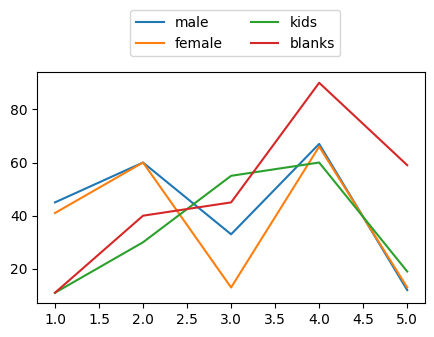

In [68]:
#legend
import matplotlib.pyplot as plt
x = [1,2,3,4,5,]
y = [45,60,33,67,12]
y1 = [41,60,13,66,13]
y2 = [11,30,55,60,19]
y3 = [11,40,45,90,59]
plt.figure(figsize = [5,3])
plt.plot(x,y,label="male")
plt.plot(x,y1,label ="female")
plt.plot(x,y2,label ="kids")
plt.plot(x,y3,label = "blanks")
plt.legend(bbox_to_anchor=(0.8,1.3),ncol  = 2)
plt.show()

In [69]:
#subplot 
import matplotlib.pyplot as plt
x = [1,2,3,4,5]
y = [45,34,56,23,45]
plt.subplot(2,2,1)
plt.plot(x,y)

x = [5,6,7,8,9]
y = [67,50,66,56,82]
plt.subplot(2,2,2)
plt.bar(x,y)

x = [2,4,7,8,9]
y = [57,50,60,55,20]
plt.subplot(2,2,3)
plt.scatter(x,y)

x = [1,4,6,9,9]
y = [47,50,40,95,10]
plt.subplot(2,2,4)
plt.stem(x,y)
plt.suptitle("Employee Data")
plt.show()

         Date    Category       Sub-Category   Amount Payment Mode
0  2023-01-01     Grocery             Grocery      30         Cash
1  2023-01-02        Food          Restaurant     890          UPI
2  2023-01-04        Food              Zomato     257          NaN
3  2023-01-06  Essentials               Diary     120          UPI
4  2023-01-06  Essentials             Perfume    1500         Cash
5  2023-01-09     Grocery  Fruits and Veggies     456         Cash
6  2023-01-10       Bills          House Rent   16000          UPI
7  2023-01-10     Grocery      Tomato KetchUp      70          UPI
8  2023-01-12        Food                Chai      15          UPI
9  2023-01-15  Essentials      Salt and Sugar      50          NaN
10 2023-01-17     Grocery           Chocolate     100          UPI
11 2023-01-17        Food          Restaurant     780         Card
12 2023-01-18  Essentials            Food Oil     120          NaN
13 2023-01-18        Food              Zomato     230         

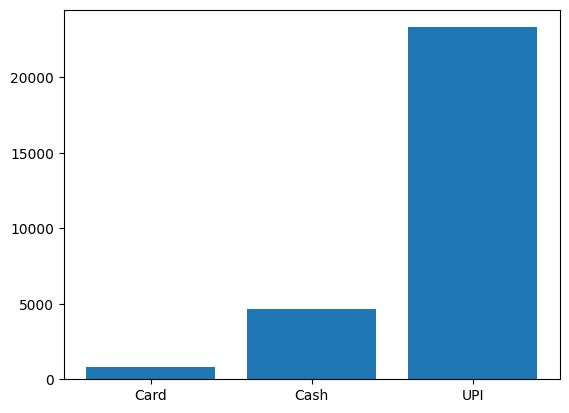

In [70]:
import pandas  as pd 
import matplotlib.pyplot as plt


data = pd.read_excel("C:/Users/Shubham/Downloads/Excel course/datasets/expense.xlsx")

df = pd.DataFrame(data)
print(df)
grouped_by = df.groupby("Payment Mode")["Amount"].sum()
print(grouped_by)
plt.bar(grouped_by.index,grouped_by.values)
plt.savefig("bar.png")
# plt.bar()
plt.show()

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline 

x = [1,2,3,4]
y = [5,8,1,10]
plt.plot(x,y)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("sample plot")
plt.show()